In [1]:
import pandas as pd
import numpy as np
import Preprocess
import pydicom
import matplotlib.pyplot as plt

In [2]:
!pip install pydicom

In [3]:
# !cat -n Preprocess.py

In [4]:
path = '/home/juhyeok/Documents/RSNA'
preprocess = Preprocess.Preprocess(path)

In [5]:
# !cat -n Preprocess.py

In [6]:
labels = preprocess.label_set('stage_1_train.csv', 0, 18000)


In [7]:
len(labels)

18000

In [8]:
# type(labels)
# labels[60:84]

In [8]:
labels = labels['Label']

In [10]:
len(labels)

18000

In [10]:
label_list = np.array(labels)
# type(label_list)
# label_list.shape

train_label = []
for i in range(0, len(label_list), 6):
    temp = label_list[i:i+6]
    sum = 0
    for j in range(0, len(temp)):
        sum = sum + temp[j] * 2**j
    train_label.append(sum)

len(train_label)
# type(train_label)

3000

In [11]:
# train_label[:30]

In [12]:
# !cat -n Preprocess.py

In [13]:
path_dcmFiles = '/home/juhyeok/Documents/RSNA/stage_1_train_images/*.dcm'
dcm_files = Preprocess.Preprocess.read_dcm_files(path_dcmFiles)

In [14]:
# !pip install pydicom

In [15]:
len(dcm_files)

200000

In [17]:
data = pydicom.dcmread(dcm_files[0])

In [18]:
dcm_files = dcm_files[0:3000]

In [88]:
# window_center, window_width, intercept, slope = preprocess.get_windowing(data)

In [89]:
# type(data.pixel_array)

In [90]:
# np.amin(data.pixel_array)

In [91]:
# np.amax(data.pixel_array)

In [92]:
# type(pydicom)

In [19]:
normalized = preprocess.transform_all_pixel_arrays(dcm_files)

In [94]:
# before_decimalized = []

# for dcm_file in dcm_files:
#     data = pydicom.dcmread(dcm_file)
#     window_center, window_width, intercept, slope = preprocess.get_windowing(data)
#     pixel_array = data.pixel_array
#     pixel_array_HU = preprocess.window_image(pixel_array, window_center, window_width, intercept, slope)
#     before_decimalized.append(pixel_array_HU)

In [95]:
# # min = np.amin(before_decimalized[0])
# # max = np.amax(before_decimalized[0])
# # print(f'(min, max) = {min, max}')

# good_arrays = []
# # if element == 1, corresponding image is not broken. element == 0, otherwise
# good_index = []
# bad_index = []
# i = 0
# for bd in before_decimalized:
#     min = np.amin(bd)
#     max = np.amax(bd)
#     if (max - min) > 0:
#         good_index.append(1)
#         bad_index.append(0)
#         good_arrays.append(bd)
#     else:
#         good_index.append(0)
#         bad_index.append(1)
#     i += 1

In [96]:
# len(good_arrays)

2962

In [97]:
# type(good_arrays)

list

In [27]:
# len(bad_index)

3000

In [28]:
# len(good_index)

3000

In [29]:
# good_labels = []
# for i in range(len(train_label)):
#     if good_index[i] == 1:
#         good_labels.append(train_label[i])

In [30]:
# len(good_labels)

2962

In [31]:
# good_labels[0:30]

In [32]:
# good_index


In [33]:
# bad_images_data = []
# for i in range(len(bad_index)):
#     if (bad_index[i] == 1):
#         bad_images_data.append(pydicom.dcmread(dcm_files[i]))

In [34]:
# bad_images_labels = []
# for i in range(len(bad_index)):
#     if (bad_index[i] == 1):
#         bad_images_labels.append(train_label[i])

In [35]:
# len(bad_images_labels)

38

In [36]:
# bad_arrays = []
# for bd in before_decimalized:
#     min = np.amin(bd)
#     max = np.amax(bd)
#     if (max - min) <= 0:
#         bad_arrays.append(bd)

In [20]:
# len(bad_arrays)
# bad_images_data

In [21]:
# fig=plt.figure(figsize=(15, 10))
# columns = 6; rows = 7
# for i in range(len(bad_images_data)):
    
#     fig.add_subplot(rows, columns, i+1)
#     plt.imshow(bad_images_data[i].pixel_array, cmap=plt.cm.bone)
#     fig.add_subplot

In [39]:
# bad_images_labels

In [22]:
# for ba in good_arrays:
#     min = np.amin(ba)
#     max = np.amax(ba)
#     print(f'(min, max) = {min, max}')

In [23]:
# for ba in bad_arrays:
#     min = np.amin(ba)
#     max = np.amax(ba)
#     print(f'(min, max) = {min, max}')

In [24]:
# good_labels # 987 labels
# good_arrays # 987 training mages

In [43]:
# normalized_dcm_list = preprocess.transform_all_pixel_arrays(good_files)

In [44]:
# normalized_dcm_list[50:100]

In [45]:
# type(normalized_dcm_list)

In [25]:
training_images = np.array(normalized)

In [27]:
training_images = training_images.reshape(3000, 512, 512, 1)

## training_images.shape

In [48]:
type(good_labels)

list

In [49]:
# label_list[12*6:13*6]

In [50]:
# label_list[:100]

In [29]:
training_label = np.array(train_label)

In [30]:
len(training_label)

3000

In [31]:
type(training_label)

numpy.ndarray

In [32]:
training_label

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
# !pip install tensorflow

In [34]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(512, 512, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1016064)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               130056320 
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [35]:
model.fit(training_images, training_label, epochs=2, validation_split=0.15, shuffle=True)

Train on 2550 samples, validate on 450 samples
Epoch 1/2
2550/2550 [==============================] - 404s 158ms/sample - loss: 1.1706 - accuracy: 0.8286 - val_loss: 0.6892 - val_accuracy: 0.8378
Epoch 2/2
2550/2550 [==============================] - 391s 153ms/sample - loss: 0.5286 - accuracy: 0.8592 - val_loss: 0.8068 - val_accuracy: 0.8333


In [37]:
# model.get_weights()

In [59]:
numpy_array = np.array(model.get_weights())

In [60]:
numpy_array.shape

(8,)

## feeding one test image into our first trained model

In [61]:
path_dcmFiles = '/home/juhyeok/Documents/RSNA/*.dcm'
test_image_dcm = Preprocess.Preprocess.read_dcm_files(path_dcmFiles)

In [135]:
# test_image = 
test_image = pydicom.dcmread(dcm_files[49])

# test_label = training_label[12]
# len(test_image)

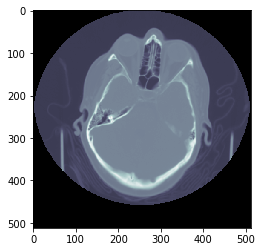

In [136]:
plt.imshow(test_image.pixel_array, cmap=plt.cm.bone)

In [137]:
def temp_conversion(test_image):
    window_center, window_width, intercept, slope = preprocess.get_windowing(test_image)
    pixel_array = test_image.pixel_array
    pixel_array_HU = preprocess.window_image(pixel_array, window_center, window_width, intercept, slope)
    pixel_array_normalized = preprocess.decimalize(pixel_array_HU)
    return pixel_array_normalized
# test_image_HU = preprocess.

In [138]:
def train_models(models, epochs):
    for model in models:
        model.summary()
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(x=training_images, y=training_labels, batch_size=100, epochs=epochs, validation_split=0.2, shuffle=True)
        test_loss, test_accuracy = model.evaluate(x=test_images, y=test_labels)
        print(f'test loss: {test_loss}, test accuracy: {test_accuracy}')

In [139]:
def reshape_image_4d(pixel_array_normalized):
    pixel_array_normalized = np.array(pixel_array_normalized)
    normalized_pixel_array_4d = pixel_array_normalized.reshape(1, 512, 512, 1)
    return normalized_pixel_array_4d

model.predict(reshape_image_4d( temp_conversion(test_image) ))

array([[0.02454458, 0.01368271, 0.01491209, 0.01726915, 0.01391013,
        0.01971266, 0.01421182, 0.01442588, 0.01410363, 0.01931449,
        0.01438687, 0.01525386, 0.01424298, 0.01901018, 0.01460804,
        0.01425697, 0.01416476, 0.02026148, 0.01363985, 0.01357838,
        0.01556095, 0.01808419, 0.01456098, 0.0142353 , 0.01398789,
        0.01842326, 0.01460826, 0.01402545, 0.01355229, 0.01799779,
        0.01532927, 0.01423289, 0.013569  , 0.02142062, 0.01563826,
        0.01527094, 0.01404876, 0.01870379, 0.01464276, 0.01433666,
        0.01504064, 0.01636287, 0.01454047, 0.01538235, 0.01464754,
        0.01677483, 0.01460785, 0.01418381, 0.01608263, 0.01908026,
        0.01463561, 0.01387875, 0.01501692, 0.0178321 , 0.01361287,
        0.01567468, 0.0148972 , 0.01511879, 0.0150044 , 0.01524669,
        0.01349834, 0.0167005 , 0.01572222, 0.01473788]], dtype=float32)

In [140]:
# model.predict(test_image)
arr = model.predict(reshape_image_4d( temp_conversion(test_image) ))

In [141]:
len(arr)
type(arr)
np.amax(arr)

0.024544578

## feeding one test image into our first trained model
### using the first image of the 2nd 1000 training image

In [67]:
path_dcmFiles = '/home/juhyeok/Documents/RSNA/input_2nd_1000/rsna-intracranial-hemorrhage-detection/stage_1_train_images/*.dcm'
test_image_dcm = Preprocess.Preprocess.read_dcm_files(path_dcmFiles)

In [68]:
len(test_image_dcm)

0

In [69]:
test_image = pydicom.dcmread(test_image_dcm[4])
plt.imshow(test_image.pixel_array, cmap=plt.cm.bone)

IndexError: list index out of range

In [ ]:
def reshape_image_4d(pixel_array_normalized):
    pixel_array_normalized = np.array(pixel_array_normalized)
    normalized_pixel_array_4d = pixel_array_normalized.reshape(1, 512, 512, 1)
    return normalized_pixel_array_4d

model.predict(reshape_image_4d( temp_conversion(test_image) ))

## Obtain loss and accuracy based on the 2nd 1000 training images
### we are using the 2nd 1000 training images as a testing set

In [ ]:
!ls
import Preprocess

In [ ]:
# path_2 = '/home/juhyeok/Documents/RSNA'
# preprocess = Preprocess.Preprocess(path_2)
# labels = preprocess.label_set('stage_1_train.csv', 6000)

In [ ]:
# !cat -n Preprocess.py
from os.path import join
import os

def label_set(path, directory, start):
    """
    Obtains a set of train labels and add two columns for Sub_type and Patient_ID
    Then, sort per ID column and take the first 6,000 labels
    """
    train_labels = pd.read_csv(os.path.join(path, directory))
    train_labels['Sub_type'] = train_labels['ID'].str.split("_", n=3, expand=True)[
        2]
    train_labels['PatientID'] = train_labels['ID'].str.split("_", n=3, expand=True)[
        1]
    train_labels = train_labels.sort_values('ID')
    labels = train_labels[start:start+6000]

    return labels

In [ ]:
labels = label_set(path_2, 'stage_1_train.csv', 6000)

In [ ]:
len(labels)

In [ ]:
labels.head(10)

In [ ]:
labels2 = labels[1000:7000]

In [ ]:
len(labels2)

In [ ]:
label_list = np.array(labels['Label'])
# type(label_list)
# label_list.shape

train_label = []
for i in range(0, len(label_list), 6):
    temp = label_list[i:i+6]
    flag = False
    index = 10
    for j in range(0, len(temp)):
        if temp[j] == 1:
            flag = True
            index = j
    if flag == True:
        train_label.append(index)
    else:
        train_label.append(6)

len(train_label)
# type(train_label)